# Project: A Survey of U.S. Civilian Firearms Transactions

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The U.S. gun control has always been criticized.
In fact, the U.S. government has made a lot of efforts to this end. The most significant one is the NICS system. Since its operation in 1998, NICS has recorded a large number of gun movements Data, it is mainly through the database system to verify the purchaser's permissions. Although NICS has so far failed to fully cover the civilian firearms business, he has also collected a large amount of data and is quite representative of the best data set used to study the state of firearms in the United States.

Now we have the data of the NICS system in the United States over the years. The data cover most of the firearms transactions in the United States. We have recorded in detail the sale and purchase of all kinds of firearms, leasing and pawn.

What will we get from this information? Has he, to some extent, reflected the state of the U.S. gun market? Pistol sales will be better than the spear? In fact, we do not know, but the data will tell us everything, is not it? Let's wait and see!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import itertools
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

load csv file(`./data/nics-firearm-background-checks.csv`) and have a look!

- have a glance of data columns
- check the data type in every column
- check NAN value 
- check the duplicates

In [3]:
# Load data and print out a few lines.
df = pd.read_csv('./data/nics-firearm-background-checks.csv')
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-01,Alabama,23930.0,0.0,5692.0,6199.0,276.0,288,0.0,12.0,...,0.0,0.0,0.0,22.0,34.0,3.0,2.0,1.0,1.0,38477
1,2018-01,Alaska,207.0,6.0,1844.0,1621.0,249.0,137,0.0,0.0,...,0.0,0.0,0.0,13.0,20.0,5.0,0.0,0.0,0.0,4429
2,2018-01,Arizona,5686.0,413.0,11659.0,6992.0,1074.0,531,0.0,10.0,...,0.0,0.0,0.0,30.0,14.0,9.0,0.0,1.0,0.0,28627
3,2018-01,Arkansas,4162.0,555.0,4935.0,5061.0,232.0,323,37.0,7.0,...,0.0,0.0,0.0,13.0,13.0,1.0,0.0,0.0,0.0,17483
4,2018-01,California,55292.0,0.0,37335.0,22919.0,3495.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119910


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12705 entries, 0 to 12704
Data columns (total 27 columns):
month                        12705 non-null object
state                        12705 non-null object
permit                       12681 non-null float64
permit_recheck               1320 non-null float64
handgun                      12685 non-null float64
long_gun                     12686 non-null float64
other                        5720 non-null float64
multiple                     12705 non-null int64
admin                        12682 non-null float64
prepawn_handgun              10762 non-null float64
prepawn_long_gun             10760 non-null float64
prepawn_other                5335 non-null float64
redemption_handgun           10765 non-null float64
redemption_long_gun          10764 non-null float64
redemption_other             5335 non-null float64
returned_handgun             2420 non-null float64
returned_long_gun            2365 non-null float64
returned_other   

In [5]:
# how many rows contains nan value
df.isnull().T.any().sum()

11715

In [6]:
# how many duplicates in data set
df.duplicated().sum()

0

### Data Cleaning (Replace this with more specific notes!)

#### Problems and solutions in data set
1. Found the data set has lots of null values, This is not normal. Because some columns are not appended when this plan satrted. so fill them with 0 is no problem. 
2. The dtype of counts of guns is float, I'll trans them to integer.
3. The month contains year and month, Just split it to 2 ineteger number to show year and month.

In [7]:
# fill nan values with 0
df.fillna(0, inplace=True)

In [8]:
# change the dtype from float to int
columns_float = df.columns[2:-1]
for c in columns_float:
    df[c] = df[c].apply(lambda x:int(x))

In [9]:
# split month column to 2 column : year and month
# such as ：'2018-01' to 2018, 1
df['year_month'] = df['month']
df['year'] = df['month'].apply(lambda x: int(x.split("-")[0]))
df['month'] = df['month'].apply(lambda x: int(x.split("-")[1]))

In [10]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_month,year
0,1,Alabama,23930,0,5692,6199,276,288,0,12,...,0,22,34,3,2,1,1,38477,2018-01,2018
1,1,Alaska,207,6,1844,1621,249,137,0,0,...,0,13,20,5,0,0,0,4429,2018-01,2018
2,1,Arizona,5686,413,11659,6992,1074,531,0,10,...,0,30,14,9,0,1,0,28627,2018-01,2018
3,1,Arkansas,4162,555,4935,5061,232,323,37,7,...,0,13,13,1,0,0,0,17483,2018-01,2018
4,1,California,55292,0,37335,22919,3495,0,0,0,...,0,0,0,0,0,0,0,119910,2018-01,2018


Now the data is more suitable for analysis! Save the processed data in stages.Save the processed data in stages.

In [11]:
df.to_csv('./data/nfbc_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ：Which year did the United States have the largest number of guns trades? How many pistols? How much guns? Specific to the month?

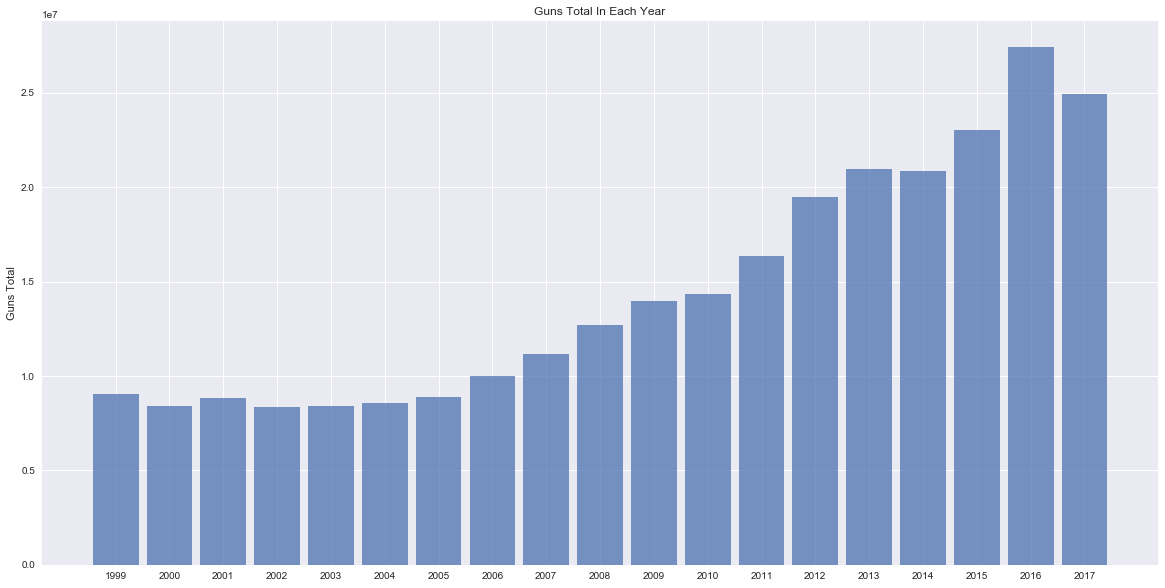

In [12]:
# group by years and show the bar 
# but we should remove 2018 and 1998, because they are not full year.
df_year_totals = df.query("year < 2018 and year > 1998").groupby(['year']).sum()
labels = np.arange(1999,2018)

sns.set()
width = 0.85       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(20,10))
plt.bar(labels, df_year_totals['totals'], width, alpha=0.75)
plt.ylabel('Guns Total')
plt.title('Guns Total In Each Year')
plt.xticks(labels)
plt.show()

The number of system inspections was relatively stable until 2006, but the total number of inspections has been on an upward trend since 2006, with the highest number of inspections of firearms trades in 2016.

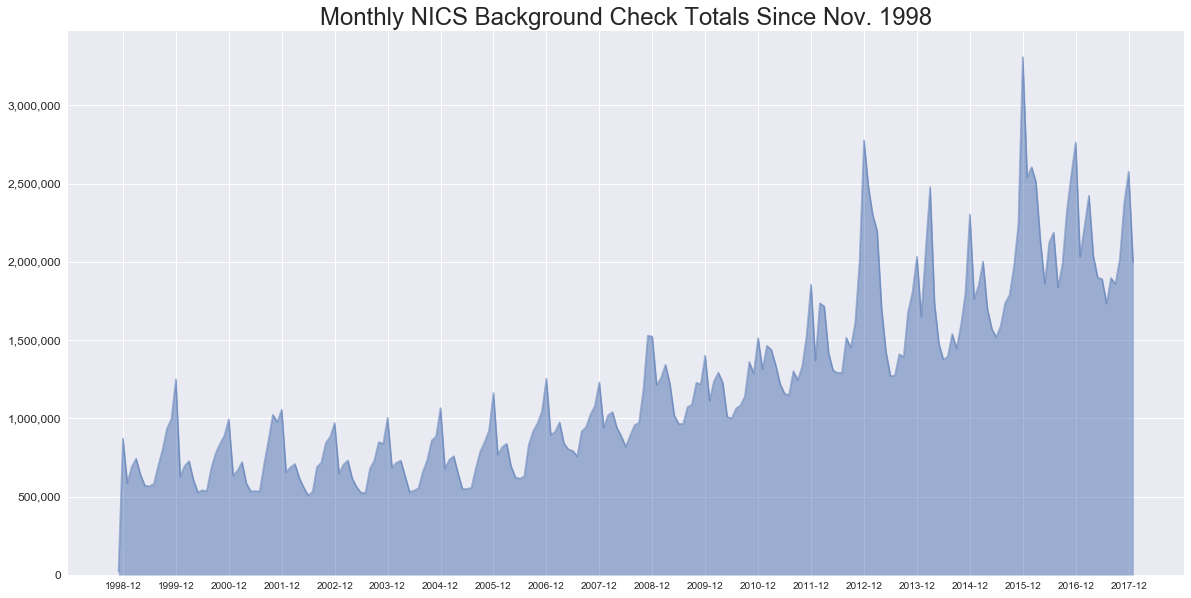

In [13]:
# group by month and show the area
df_month_totals = df.groupby(['year_month'], as_index=False).sum()
df_month_totals
ax = df_month_totals['totals'].plot.area(figsize=(20,10), alpha=0.5)
tick_placement = pd.np.arange(1, len(df_month_totals), 12)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);

The total amount of transactions checked through the system has been increasing year by year. According to the monthly area charts, we find that the annual peak is actually December.
Then we take a look at the highest number of transactions in each of the several months of the year. 

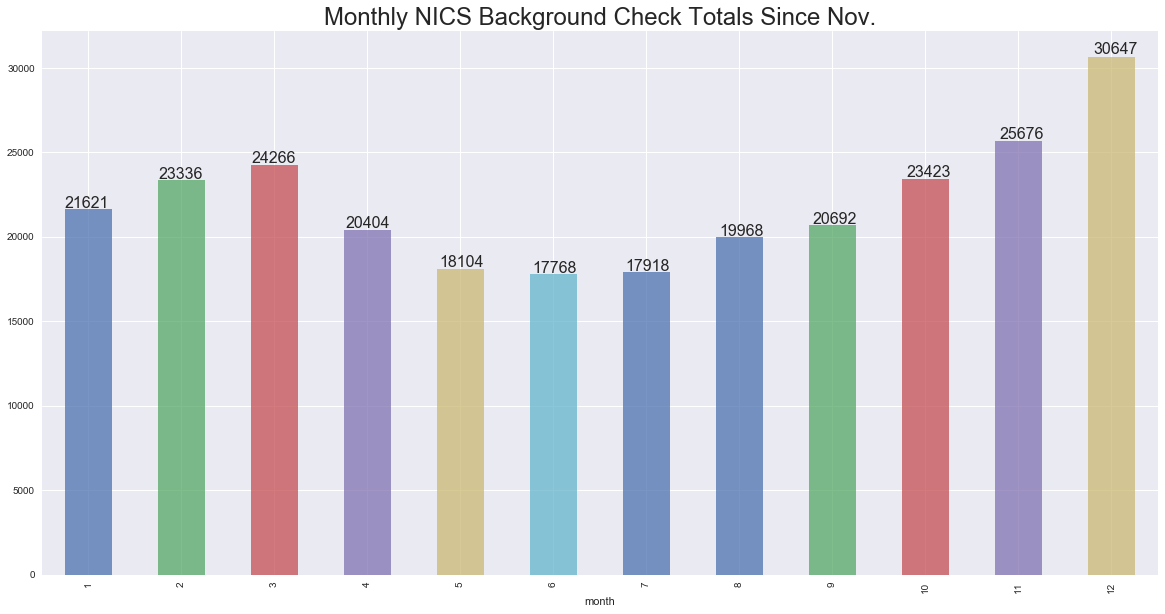

In [14]:
# show the mean of each month in every year by plotting bar.
# we should remove 2018 and 1998, because they are not full year.
df_month_mean = df.query("year < 2018 and year > 1998").groupby(['month']).mean()
labels = np.arange(1999,2018)

ax = df_month_mean['totals'].plot.bar(figsize=(20,10), alpha=0.75)
ax.set_title("Monthly NICS Background Check Totals Since Nov.", fontsize=24);
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

Through the observation of the monthly data, it was found that the number of guns traded in May, June and July was mediocre, but the number of guns trades was relatively large from September to January. 

### Research Question 2 : Excluding private trading and leasing pawn and other channels, the conventional civilian firearms transactions, the different types of firearms in the transaction accounted for? Which different types of guns in different periods and what is the difference? Pistols in that period of time more popular?

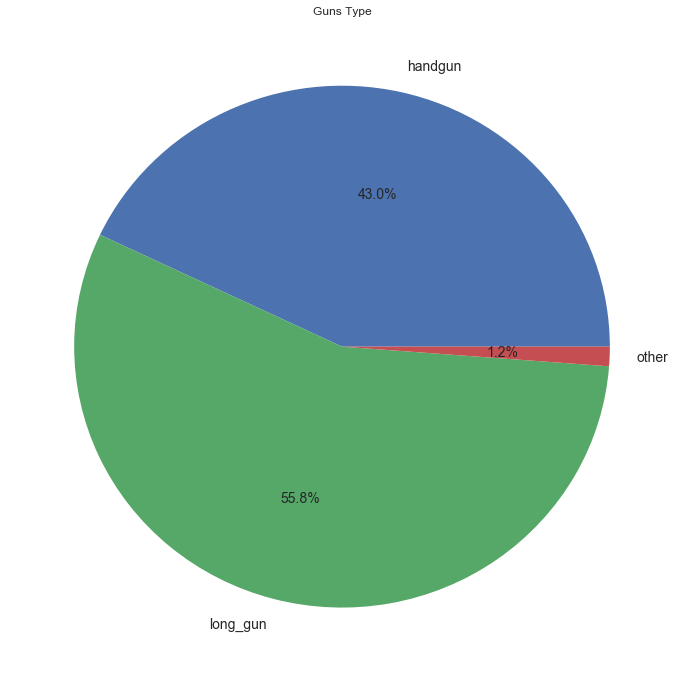

In [15]:
#Just remove the gun trade data from the mainstream channels we care about
df_guns_type = df.loc[:,'handgun':'other'].sum()
df_guns_type.plot.pie(autopct='%1.1f%%', title="Guns Type", label="",
                  fontsize=14, figsize=(12,12));

Through the statistics on all the data, it was found that the longs were more popular than the shorts.But the survey is a bit crude and we need to compare it at different times.

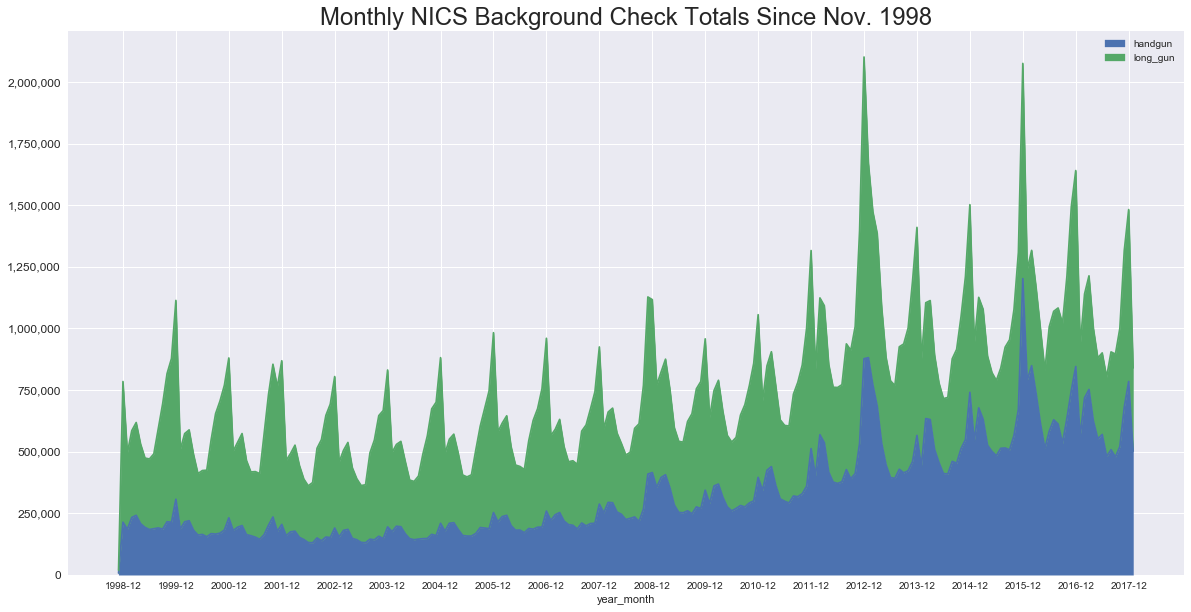

In [16]:
# Compare the rifle and rifle data by month, and this 
# time we directly exclude the other types of guns.
df_guns_type = df.groupby(['year_month']).sum().loc[:,'handgun':'long_gun']
ax = df_guns_type.plot.area(figsize=(20,10));
tick_placement = pd.np.arange(1, len(df_guns_type), 12)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);

We found that the trend of guns and pistols are basically the same, but by the year 2015, the area of guns in the plot seems to outnumber the rifles. Let's make a detailed comparison.

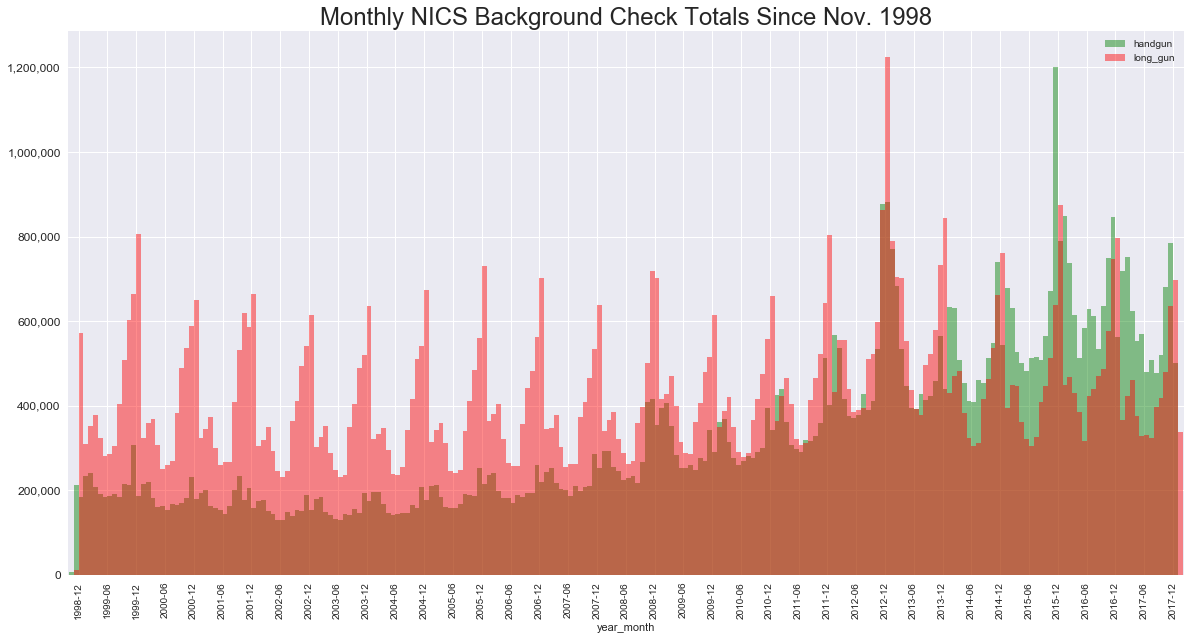

In [17]:
df_guns_type = df.groupby(['year_month']).sum().loc[:,'handgun':'long_gun']
ax = df_guns_type.plot.bar(figsize=(20,10), alpha=0.45, width=2, color=['green', 'red']);
tick_placement = pd.np.arange(1, len(df_guns_type), 6)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);

It is clear that since 2014, the number of pistol transactions has overtaken the rifle and continues until now, which may be related to a government policy.

**Long gun and handgun in different times.**

To study this issue requires a bit of additional information, that is, from 1998 to the present time of several presidents. Based on these times, grouping was conducted to compare the U.S. gun trade data for different presidential periods. In order to be fair, we still discard the channels of leasing and pawnshops which appeared only in the latter part of the period, and only keep the mainstream trading channels.

> **Presidential ruling schedule**：
- Bill Clinton ： 1993 - 2001
- George Walker Bush： 2001 - 2009
- Barack Hussein Obama II： 2009 - 2017
- Donald John Trump：2017 -

In [18]:
# create edges by Presidential ruling schedule
bin_edges = [ 1998, 2001, 2009, 2017, 2018] 
bin_names = ['Clinton', 'Bush', 'Obama', 'Trump']
#cut dataframe by presidential ruling schedule
df['president'] = pd.cut(df['year'], bins=bin_edges, labels=bin_names)

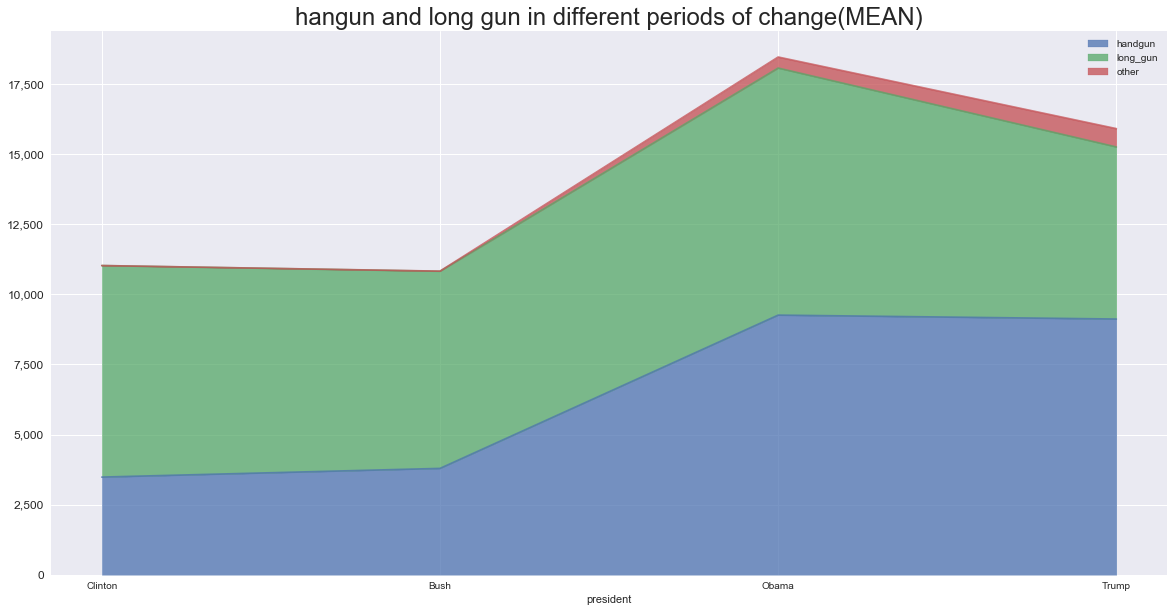

In [19]:
df_pre = df.groupby('president').mean()
datas = df_pre.loc[:,'handgun':'other']
ax = datas.plot.area(figsize=(20,10), alpha=0.75);
tick_placement = np.arange(0, len(datas), 1)
ax.set_title("hangun and long gun in different periods of change(MEAN)", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels(bin_names);

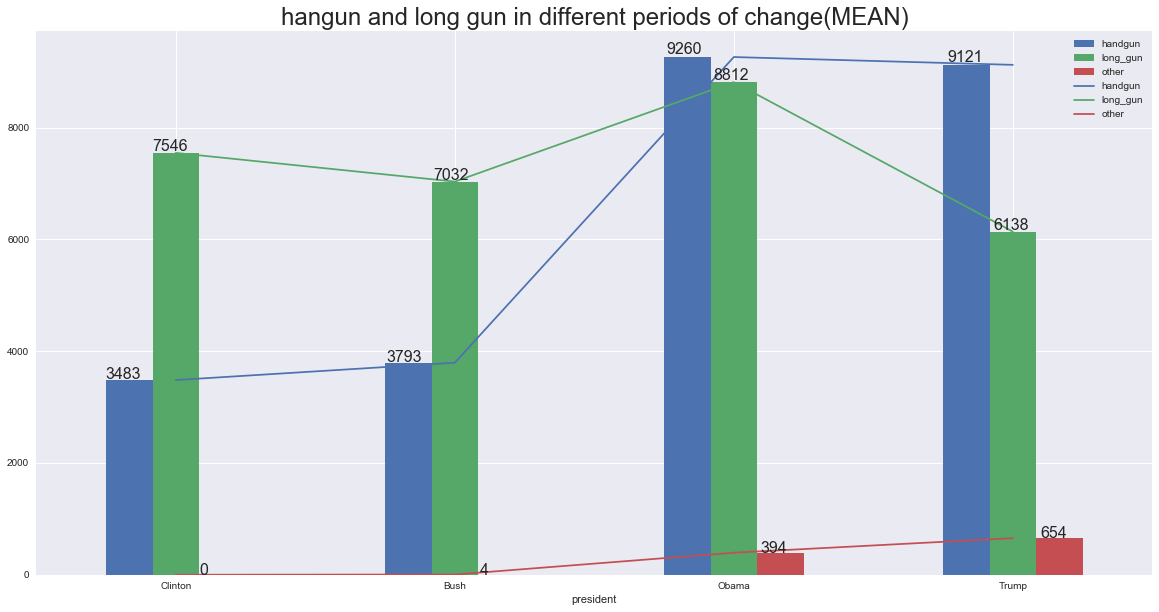

In [20]:
ax = datas.plot.bar(figsize=(20,10))
datas.plot.line(ax=ax)
ax.set_title('hangun and long gun in different periods of change(MEAN)',fontsize=24)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16);

It can be found that the regular volume of transactions that were imposed during the Obama administration has seen an explosive growth. Although Trump has only been in office for one year now, the average number of traded guns is still lower than that of Obama.

Combined with the monthly chart above, we found a curious phenomenon: the number of firearms transactions reached a peak during Obama's tenure and reelection.

### Research Question 3: How are the firearms transactions in different regions? What is the relationship between mandatory quantity and population?

In [21]:
#group data set by state and get sum
df_region = df.groupby(['state'], as_index=False).mean()

Let's take a look at those cities where authentication systems operate more frequently. In other words, NICS systems are the best performing in which cities.

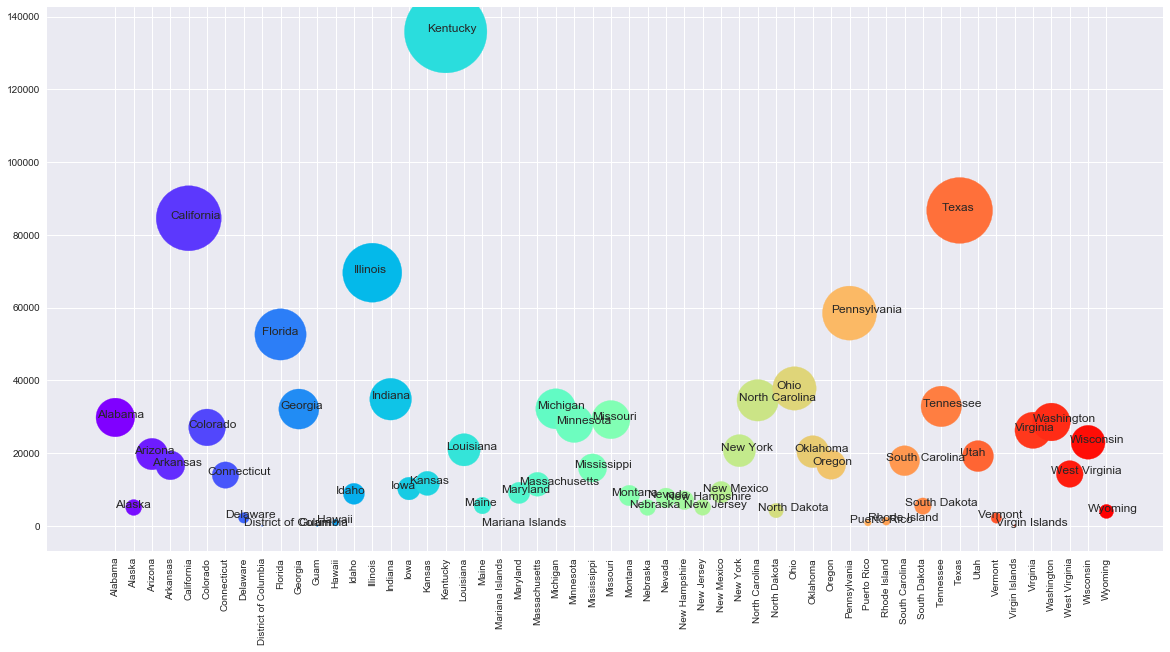

In [172]:
x = np.arange(len(df_region))
y = df_region['totals']
s = df_region['totals'] / 20
c = cm.rainbow(np.linspace(0, 1, len(y)))
plt.figure(figsize=(20,10))
ax = plt.subplot()
plt.xticks(x, df_region['state'], rotation='vertical')
ax.scatter(x=x, y=y, s=s, color=c)
for i, txt in zip(x,df_region['state']):
    ax.annotate(txt, (x[i]-1, y[i]))

Kentucky's total gun trade looks to be far ahead.But, Why? Is it because the state has a large population?

To solve this problem, we need to use census data from the United States.

In [145]:
#import the census data
df_pop = pd.read_csv('data/u.s.-census-data.csv')
df_pop = df_pop.T
# we only use the estimates in 2016 and append it to 
df_2016_est = df_pop.iloc[2:,1].reset_index()
df_2016_est.columns=['state', '2016_est']
#change the 2016_est from string to number
df_2016_est['2016_est'] = df_2016_est['2016_est'].str.replace(',','').astype(int)
# get the 2016 regioned data
df_2016_region = df.groupby(['year','state'], as_index=False).sum().query("year==2016")
# merge dataframe
df_2016 = pd.merge(df_2016_region, df_2016_est)
df_2016.head()

,year,state,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,2016_est
0,2016,Alabama,78,291039,0,153123,121963,6104,6545,5,...,0,0,72,65,4,3,2,0,616947,4780131
1,2016,Alaska,78,3121,0,37491,36887,2889,2316,0,...,0,0,39,66,1,2,3,0,87647,710249
2,2016,Arizona,78,87771,5109,166784,108988,13122,7908,0,...,0,0,76,56,11,11,11,1,416279,6392301
3,2016,Arkansas,78,55456,7036,80244,82120,3059,4400,143,...,0,0,72,64,6,7,4,1,266014,2916025
4,2016,California,78,1036981,0,560355,554550,211707,0,0,...,0,0,0,0,0,0,0,0,2377167,37254522


Now we have the dataframe witch contains populations data anda guns data in 2016, then we can find the relationship between them.

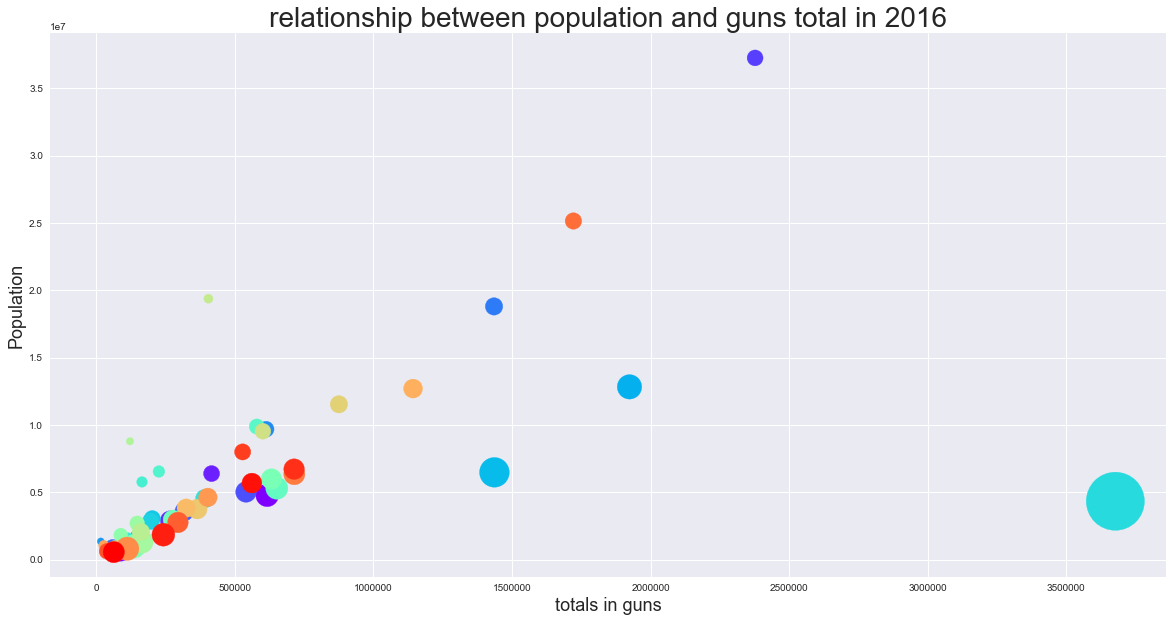

In [191]:
y = df_2016['2016_est']
x = df_2016['totals']
s =  df_2016['totals'] / df_2016['2016_est']  * 4000
c = cm.rainbow(np.linspace(0, 1, len(y)))
plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.scatter(x=x, y=y, s=s, color=c)
plt.xlabel('totals in guns', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.title('relationship between population and guns total in 2016', fontsize=28);

We can find that there is a positive correlation between total population and total firearms.

<a id='conclusions'></a>
## Conclusions

In general, the number of guns in the United States has been rising year by year. In the Obama and Trump era, the number of firearms began to increase rapidly.And the amount of short shots gradually exceeds that of long shots.Finally, the number of guns is also related to the size of the city. The more people in the city, the more guns there are, but this is not always the case.
Perhaps, people are increasingly insecure, so most people will buy guns. People tend to use short shots for self-defense rather than long shots, perhaps to avoid accidents.
Anyway, I hope everyone will not launch bullets and hope that world peace.
